# Dashboard Understanding - Notebook showing the working of dashboard


***Data Flow***

--> Select Points $(x, Q^2)$ 

--> add noise to cross section ***(created from concatenation of obs_p and obs_n of corresponding $(x,Q^2)$)***

--> send the crossection data to the Model 

--> generates output (parameters) 

--> Parameters are used to generate PDF UP and PDF DOWN 


***Equation to add Noise***

$(xsec)' = xsec + (\sigma * f * R)$

- uncertainity ($\sigma$)

- noise ($f$)

- Random value ($R$)

***To generate PDFs***

$x$ = an array of range(0,100)

$Q^2$ = constant value

In [17]:
# libraries
import numpy as np #--- pdf,mlutils
import pandas as pd
import plotly.graph_objs as go
import dash
import matplotlib.pyplot as plt

#---mlutils
from tensorflow.keras.models import load_model
#from keras.models import load_model
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
import h5py

#---pdf libs
from scipy.special import gamma
import sys,os

#--- only for jupyter
from ipywidgets import interactive, HBox, VBox

In [3]:
#-- Loading the data
X = np.load("data/X.npy")
Q2 = np.load("data/Q2.npy")
obs_p = np.load("data/obs_p.npy") #-- toy data is of shape (100,101)
obs_n = np.load("data/obs_n.npy") #-- toy data is of shape (100,101)
par = np.load('data/par.npy')
obs_p.shape, obs_n.shape, X.shape, Q2.shape

((100, 101), (100, 101), (101,), (101,))

In [4]:
truebar = par[0]
par.shape, truebar.shape

((100, 10), (10,))

In [5]:
data = pd.DataFrame(data = X,
                    index=np.arange(len(X)),
                    columns=['X']
                    )
data['Q2'] = Q2
data['obs_p'] = obs_p[0,:] #--- currently taking only one sample
data['obs_n'] = obs_n[0,:] #--- currently taking only one sample
data['is_selected'] = False
#data['co-ord'] = list(zip(X,Q2))
data['err_obs_p'] = 0.05 * data['obs_p']
data['err_obs_n'] = 0.05 * data['obs_n']
data['err_obs_p_mod'] = data['err_obs_p'].copy()
data['err_obs_n_mod'] = data['err_obs_n'].copy()
data.head()

,X,Q2,obs_p,obs_n,is_selected,err_obs_p,err_obs_n,err_obs_p_mod,err_obs_n_mod
0,0.012055,1.000000,2.627395,0.727704,False,0.131370,0.036385,0.131370,0.036385
1,0.019467,1.000000,2.862549,0.816804,False,0.143127,0.040840,0.143127,0.040840
2,0.019467,1.260221,2.798435,0.799198,False,0.139922,0.039960,0.139922,0.039960
3,0.019467,1.588156,2.739728,0.783056,False,0.136986,0.039153,0.136986,0.039153
4,0.031435,1.000000,3.108782,0.920222,False,0.155439,0.046011,0.155439,0.046011


In [6]:
F_value = 0.5

In [7]:
dataSelected = False
print(dataSelected)
def selectedData(trace,points,selector):
    global dataSelected
    dataSelected = True
    print(points)
#     temp_x = []
#     temp_q2 = []
#     temp_op = []
#     temp_on = []
#    t.data[0].cells.values = [data.loc[points.point_inds][col] for col in ['X','Q2','obs_p','obs_n']]
    data.loc[points.point_inds,'is_selected'] =  True
    for pts in points.point_inds:
        data.loc[pts,'err_obs_p_mod'] *= F_value
        data.loc[pts,'err_obs_n_mod'] *= F_value
    return dataSelected

False


In [8]:
#plotting the data
figure = go.FigureWidget(data=go.Scattergl(x=data['X'],y=data['Q2'],mode='markers',),
                   layout=go.Layout(xaxis_title="X",yaxis_title="Q2"))
#figure.show()
input_data = figure.data[0]

#--- for jupyter notebook
# Create a table FigureWidget that updates on selection from points in the scatter plot of f
t = go.FigureWidget([go.Table(
    header=dict(values=['X','Q2','obs_p','obs_n'],
                fill = dict(color='#C2D4FF'),
                align = ['left'] * 5),
    cells=dict(values=[data[col] for col in ['X','Q2','obs_p','obs_n']],
               fill = dict(color='#F5F8FF'),
               align = ['left'] * 5))])


input_data.on_selection(selectedData)


# Put everything together ---- jupyter
VBox((figure,t))

    'data': [{'mode': 'markers',
              'type': 'scattergl',
            …

Points(point_inds=[81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
                   96, 97, 98, 99, 100],
       xs=[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
           0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9],
       ys=[1, 1.260220615891982, 1.5881560007191666, 2.0014269333588555,
           2.5222394826202974, 3.1785781942148255, 4.005709769574232,
           5.048078032897367, 6.361692007688706, 8.017135420044562,
           10.10335933673798, 12.732461725921944, 16.045710758062445,
           20.221135493950054, 25.483091826220953, 32.11431767607212,
           40.47112520069036, 51.00254632625551, 64.27446034333309, 81],
       trace_name='trace 0',
       trace_index=0)


In [9]:
print(dataSelected)
data[data['is_selected'] == True]

True


,X,Q2,obs_p,obs_n,is_selected,err_obs_p,err_obs_n,err_obs_p_mod,err_obs_n_mod
81,0.9,1.000000,0.356107,0.093364,True,0.017805,0.004668,0.008903,0.002334
82,0.9,1.260221,0.354355,0.092944,True,0.017718,0.004647,0.008859,0.002324
83,0.9,1.588156,0.352701,0.092546,True,0.017635,0.004627,0.008818,0.002314
84,0.9,2.001427,0.351136,0.092169,True,0.017557,0.004608,0.008778,0.002304
85,0.9,2.522239,0.349649,0.091810,True,0.017482,0.004590,0.008741,0.002295
86,0.9,3.178578,0.348233,0.091467,True,0.017412,0.004573,0.008706,0.002287
87,0.9,4.005710,0.346883,0.091140,True,0.017344,0.004557,0.008672,0.002279
88,0.9,5.048078,0.345591,0.090827,True,0.017280,0.004541,0.008640,0.002271
89,0.9,6.361692,0.344353,0.090526,True,0.017218,0.004526,0.008609,0.002263
90,0.9,8.017135,0.343165,0.090237,True,0.017158,0.004512,0.008579,0.002256


#### Constant Values For Uncertainity, Noise (F-value)


In [10]:
uncertainity_value = 0.05
f_value = 1

#--- default values of noise and uncertainity
d_uncertainity_value = 0.05
d_f_value = 1

#### Adding noise to the crossectional values

we add noise repeatedly for a range of 1000 where we get an array of shape (1000,101)

In [13]:
def addNoiseSelected(data, n_value, uncertainity_value, validation_column, data_column, num_features):
    predList = []
    #--- formula 
    #--- for the selected_data : xsec + Randomnumber * uncertainity * noise_value
    for i in range(1000):
        #--- create a pseudo table 
        data_copy = data.copy()
        #--- modify columns
        data_copy['obs_p'] += np.random.randn(len(data_copy['obs_p'])) * data_copy['err_obs_p_mod']
        data_copy['obs_n'] += np.random.randn(len(data_copy['obs_n'])) * data_copy['err_obs_n_mod']
        predList.append(np.append(data_copy['obs_p'],data_copy['obs_n']))
        #predList.append(np.where(data[validation_column]==True, #--- if data is selected
                                 
#                                  data[data_column] + (float(uncertainity_value) * np.random.randn(num_features,) * float(n_value)), #---- add value (noise * uncertainity * random number)
                                 
#                                  data[data_column] + (float(d_uncertainity_value) * np.random.randn(num_features,) * float(d_f_value)))) #--- else remain the data as it is
#         #predList.append(data + (alpha * np.random.rand(num_features,)))
    predList = np.array(predList)
    return predList


In [14]:
xsec = addNoiseSelected(data, f_value, uncertainity_value, 'is_selected', 'obs_p', len(data['obs_p']))
xsec.shape

(1000, 202)

In [13]:
def calculate_xsec(p_Data, n_Data):
    return np.concatenate((p_Data, n_Data), axis = 1)

In [14]:
#--- if data is not selected we add noise to all the values
if not dataSelected : 
    data['is_selected'] = True
    print('--> no data selected so adding noise to every point')

#--- get the list of data with added noise
obs_p_noised = addNoiseSelected(data, f_value, uncertainity_value, 'is_selected', 'obs_p', len(data['obs_p']))
obs_n_noised = addNoiseSelected(data, f_value, uncertainity_value, 'is_selected', 'obs_n', len(data['obs_n']))

#--- concatenate the lists to get the cross-sectional Data
xsec = calculate_xsec(obs_p_noised, obs_n_noised)
print(xsec.shape)

(1000, 202)


In [15]:
print(data['obs_p'].to_numpy())
print(obs_p_noised[0])

[2.62739496 2.86254862 2.79843463 2.73972796 3.10878211 3.04933402
 2.99471389 2.9442627  2.8974438  3.35659226 3.30344547 3.25444417
 3.20903486 3.16676522 3.12726121 3.09021019 3.58513279 3.54019841
 3.49861805 3.45995439 3.42384878 3.39000366 3.3581695  3.32813513
 3.29972031 3.74999402 3.71536454 3.6831932  3.65316802 3.62503212
 3.59857158 3.57360641 3.54998376 3.52757277 3.50626056 3.48594912
 3.75762651 3.73516719 3.71420144 3.69454633 3.67605045 3.65858711
 3.64204921 3.62634543 3.61139726 3.59713674 3.58350463 3.57044898
 3.55792403 3.41611362 3.40619255 3.39685002 3.38802057 3.37964942
 3.37169021 3.36410333 3.35685472 3.34991481 3.34325782 3.33686107
 3.33070454 3.32477049 3.31904304 3.31350802 2.37396808 2.37246489
 2.37097214 2.36949452 2.36803518 2.36659621 2.36517894 2.36378415
 2.36241224 2.36106331 2.35973725 2.35843382 2.35715266 2.35589334
 2.35465539 2.3534383  2.35224153 0.35610736 0.35435511 0.35270143
 0.35113571 0.34964895 0.34823348 0.3468827  0.34559092 0.3443

In [16]:
print('--> Before Adding Noise : ',data['obs_p'].to_numpy()[-3:])
print('--> After Adding Noise : ',obs_p_noised[0][-3:])

--> Before Adding Noise :  [0.33506127 0.33418759 0.33333884]
--> After Adding Noise :  [0.34282126 0.18783542 0.62385435]


In [17]:
print('--> Before Adding Noise : ',data['obs_n'].to_numpy()[-3:])
print('--> After Adding Noise : ',obs_n_noised[0][-3:])

--> Before Adding Noise :  [0.08825534 0.08804079 0.0878322 ]
--> After Adding Noise :  [0.21578853 0.16168074 0.1892816 ]


#### Running the model to generate the parameters

In [106]:
def backwardPredict(fname, model, xsec_noised):
    # load xsec file
    #xsec = calculate_xsec(dataframe)
    ml = load_model('mldata/%s.h5'%model) 

    # make the prediction
    pred = ml.predict(xsec_noised)
    #pred = par_scaler.inverse_transform(pred)
    np.save('data/%s-par.npy'%fname, pred)
    return pred

In [107]:
fname = 'test_backward'
model_select = 'my_model'
nn_pred = backwardPredict(fname, model_select, xsec)

In [108]:
nn_pred.shape

(1000, 10)

#### Calculate pdfs from generated parmaeters

In [109]:
#--- need to know the significance of each term
Q02=4.0
lam2=0.2**2
pu=np.ones(10)
pd=np.ones(10)
pu[5:]*=0.1
pd[5:]*=0.1

In [110]:
def set_params(par):
    pu[:5]=par[:5]
    pd[:5]=par[5:]
  
def get_s(Q2):
    return np.log(np.log(Q2/lam2)/np.log(Q02/lam2))

def _get_shape(x,p):
    return p[0]*x**p[1]*(1-x)**p[2]*(1+p[3]*x+p[4]*x**2)
    
def get_shape(x,p,s):
    N=p[0] + p[5] * s
    a=p[1] + p[6] * s
    b=p[2] + p[7] * s
    c=p[3] + p[8] * s
    d=p[4] + p[9] * s
    return _get_shape(x,[N,a,b,c,d])

def get_pdf(x,Q2,flav):
    s=get_s(Q2)
    if flav=='u': return get_shape(x,pu,s)
    if flav=='d': return get_shape(x,pd,s)
    
def calculate_pdf(data_par):
    x = np.linspace(0.01,0.99,100)
    Q2=4.0
    u=[]
    d=[]
    for i in range(data_par.shape[0]):
        set_params(data_par[i])
        u.append(get_pdf(x,Q2,'u'))
        d.append(get_pdf(x,Q2,'d'))
    u = np.array(u)
    d = np.array(d)
    print('--> (RUNLOG) - Up data shape : ',u.shape)
    print('--> (RUNLOG) - Down data Shape : ',d.shape)
    return {'u' : u, 'd' : d, 'x-axis' : x}

In [111]:
pdf_dict = calculate_pdf(nn_pred)

--> (RUNLOG) - Up data shape :  (1000, 100)
--> (RUNLOG) - Down data Shape :  (1000, 100)


In [112]:
#--- Plot the figure (Ratio Plot)
figure_g = go.Figure()
pdf_up_trace = go.Scattergl(
                        x = pdf_dict['x-axis'],
                        y = np.ones(len(pdf_dict['x-axis'])),#pdf_dict['u'].mean(axis=0),
                        name='PDF UP',
                        showlegend=True,
                        error_y=dict(
                                type='data',
                                color='orange',
                                array=pdf_dict['u'].std(axis=0)/pdf_dict['d'].mean(axis=0),
                                #array=pdf_dict['u'].std(axis=0)*5,
                                visible=True
                                )
                        )
#--- Plotting pdf_up
figure_g.add_trace(pdf_up_trace)

In [113]:
#---- generate Plots Function
def generatePDFplots(x,yTrue,yPredUpper,yPred,yPredLower,graphTitle):
    #--- Pred ERROR trace upperBound
    predErrTraceUpper = go.Scatter(
                        x = x,
                        y = yPredUpper,
                        line_color='rgba(255,255,255,0)',
                        name='Pred Value Upper',
                        mode='lines',
                        marker=dict(color="#444"),
                        line=dict(width=0),
                        fillcolor='rgba(248, 148, 6, 0.4)',
                        fill='tonexty',
                        showlegend=False)

    #--- Pred trace
    predTrace = go.Scatter(x = x,
                         y = yPred,
                         #line_color='rgb(248, 148, 6)',
                         name='Pred Value',
                         mode='lines',
                         line=dict(color='rgba(217, 30, 24, 1)'),
                         #marker=dict(color="rgba(248, 148, 6,0.4)"),
                         fillcolor='rgba(248, 148, 6, 0.4)',
                         fill='tonexty',
                         showlegend=True)

    #--- Pred ERROR trace lowerBound
    predErrTraceLower = go.Scatter(
                        x = x,
                        y = yPredLower,
                        #fillcolor='rgba(248, 148, 6,0.4)',
                        #line_color='rgba(255,255,255,0)',
                        mode='lines',                    
                        marker=dict(color="#444"),
                        line=dict(width=0),
                        name='Pred Value Lower',
                        showlegend=False)

    #--- concatenate the data
    predData = [predErrTraceLower, predTrace, predErrTraceUpper]
    predLayout = go.Layout(
                #yaxis=dict(title='Wind speed (m/s)'),
                title=dict(
                        text = graphTitle,
                        xanchor = "left",
                        yanchor = "top",
                        pad = dict(l=350)
                    ),
                #showlegend = False
                )
    #--- create figure
    graphPlot = go.Figure(data=predData, layout=predLayout)

    #--- true trace
    True_Trace = go.Scattergl(
                        x = x,
                        y = yTrue,
                        name='True Value',
                        line_color='rgba(83, 51, 237, 1)',
                        showlegend=True)
    #--- add true trace - rgba(248, 148, 6, 1)
    graphPlot.add_trace(True_Trace)
    return graphPlot

In [114]:
#--- generate PDF PLots ---- PDF UP
x = np.linspace(0.01,0.99,100)
Q2=4.0

set_params(truebar)
u = get_pdf(x,Q2,'u')
d = get_pdf(x,Q2,'d')

#--- yPred
yPred = pdf_dict['u'].mean(axis = 0)

#--- bounds
upperBound = pdf_dict['u'].mean(axis=0) + pdf_dict['u'].std(axis=0)
lowerbound = pdf_dict['u'].mean(axis=0) - pdf_dict['u'].std(axis=0)


pdfUpPlot = generatePDFplots(x,u,upperBound,yPred,lowerbound,'PDF-Up Absolute Plot')
pdfUpPlot.show()

In [115]:
#--- PDF Down Plot
#--- yPred
yPred = pdf_dict['d'].mean(axis = 0)

#--- bounds
upperBound = pdf_dict['d'].mean(axis=0) + pdf_dict['d'].std(axis=0)
lowerbound = pdf_dict['d'].mean(axis=0) - pdf_dict['d'].std(axis=0)


pdfUpPlot = generatePDFplots(x,d,upperBound,yPred,lowerbound,'PDF-Down Absolute Plot')
pdfUpPlot.show()

In [116]:
#---- ratio plot
u_n = u/u 
d_n = d/d

#--- bounds
upperBound = pdf_dict['u'].mean(axis=0)/u + pdf_dict['u'].std(axis=0)/u
lowerbound = pdf_dict['u'].mean(axis=0)/u - pdf_dict['u'].std(axis=0)/u

#--- yPred
yPred = pdf_dict['u'].mean(axis = 0)/u

ratioPlot = generatePDFplots(x,u_n,upperBound,yPred,lowerbound,'PDF-Up Ratio Plot')
ratioPlot.show()

In [117]:
#--- yPred ---- PDF Down
yPred = pdf_dict['d'].mean(axis = 0)/d

#--- bounds
upperBound = pdf_dict['d'].mean(axis=0)/d + pdf_dict['d'].std(axis=0)/d
lowerbound = pdf_dict['d'].mean(axis=0)/d - pdf_dict['d'].std(axis=0)/d

ratioPlot = generatePDFplots(x,d_n,upperBound,yPred,lowerbound,'PDF-Down Ratio Plot')
ratioPlot.show()

In [50]:


#--- Pred ERROR trace upperBound
predErrTraceUpper = go.Scatter(
                        x = x,
                        y = upperBound,
                        line_color='rgba(255,255,255,0)',
                        name='Pred Value Upper',
                        mode='lines',
                        marker=dict(color="#444"),
                        line=dict(width=0),
                        fillcolor='rgba(248, 148, 6, 0.4)',
                        fill='tonexty',
                        showlegend=False)

#--- Pred trace
predTrace = go.Scatter(x = x,
                         y = pdf_dict['u'].mean(axis = 0)/u,
                         #line_color='rgb(248, 148, 6)',
                         name='Pred Value',
                         mode='lines',
                         line=dict(color='rgba(217, 30, 24, 1)'),
                         #marker=dict(color="rgba(248, 148, 6,0.4)"),
                         fillcolor='rgba(248, 148, 6, 0.4)',
                         fill='tonexty',
                         showlegend=True)

#--- Pred ERROR trace lowerBound
predErrTraceLower = go.Scatter(
                        x = x,
                        y = lowerbound,
                        #fillcolor='rgba(248, 148, 6,0.4)',
                        #line_color='rgba(255,255,255,0)',
                        mode='lines',                    
                        marker=dict(color="#444"),
                        line=dict(width=0),
                        name='Pred Value Lower',
                        showlegend=False)

#--- 
predData = [predErrTraceLower, predTrace, predErrTraceUpper]
predLayout = go.Layout(
                #yaxis=dict(title='Wind speed (m/s)'),
                title='PDF UP Ratio Plot ',
                #showlegend = False
                )
ratioPlot = go.Figure(data=predData, layout=predLayout)

#--- true trace
True_Trace = go.Scattergl(
                        x = x,
                        y = u_n,
                        name='True Value',
                        showlegend=True)
#--- add true trace - rgba(248, 148, 6, 1)
ratioPlot.add_trace(True_Trace)

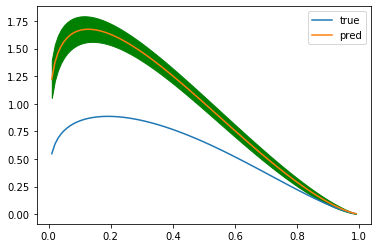

In [61]:
x = np.linspace(0.01,0.99,100)
Q2=4.0
set_params(truebar)
u = get_pdf(x,Q2,'u')
d = get_pdf(x,Q2,'d')
plt.plot(x,u) #--- true
plt.plot(pdf_dict['x-axis'], pdf_dict['u'].mean(axis = 0))
plt.legend(['true', 'pred'])
plt.fill_between(x,pdf_dict['u'].mean(axis=0) + pdf_dict['u'].std(axis=0),pdf_dict['u'].mean(axis=0) - pdf_dict['u'].std(axis=0),color="g")

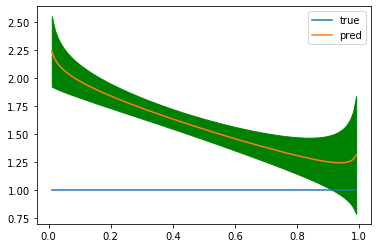

In [38]:
x = np.linspace(0.01,0.99,100)
Q2=4.0
set_params(truebar)
u = get_pdf(x,Q2,'u')
d = get_pdf(x,Q2,'d')
u_n = u/u
d_n = d/d
plt.plot(x,u_n) #--- true
plt.plot(pdf_dict['x-axis'], pdf_dict['u'].mean(axis = 0)/u)
plt.legend(['true', 'pred'])
plt.fill_between(x,pdf_dict['u'].mean(axis=0)/u + pdf_dict['u'].std(axis=0)/u,pdf_dict['u'].mean(axis=0)/u - pdf_dict['u'].std(axis=0)/u,color="g")

In [45]:
#--- Plot the figure (Ratio Plot)
figure_g = go.Figure()
pdf_up_trace = go.Scattergl(
                        x = x,
                        y = np.ones(len(pdf_dict['x-axis'])),#pdf_dict['u'].mean(axis=0),
                        name='PDF UP',
                        showlegend=True,
                        error_y=dict(
                                type='data',
                                color='orange',
                                array=pdf_dict['u'].std(axis=0)/u,
                                #array=pdf_dict['u'].std(axis=0)*5,
                                visible=True
                                )
                        )
#--- Plotting pdf_up
figure_g.add_trace(pdf_up_trace)

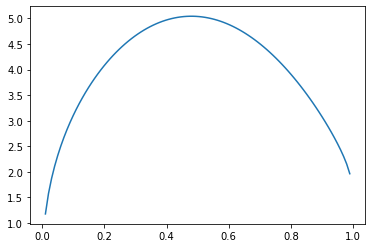

In [128]:
#--- plotting true Values 
x = np.linspace(0.01,0.99,100)
Q2=4.0
set_params(par[1])
u = get_pdf(x,Q2,'u')
d = get_pdf(x,Q2,'d')
plt.plot(x,u) #--- true
plt.show()

### New Model Code

In [18]:
X = np.load("data/X.npy")
Q2 = np.load("data/Q2.npy")

In [19]:
cross = np.load('Model/crossTest_Toydata.npy')

In [35]:
import pickle
from tensorflow import keras
import mdn

scaleCross = pickle.load(open( 'Model/crossScaler.sav', 'rb'))
scaleOutput = pickle.load(open( 'Model/parScaler.sav','rb'))

In [20]:
cross.shape

(12, 202)

In [27]:
crossScaled = scaleCross.transform(cross)

In [28]:
crossScaled[0]

array([-0.41488139, -0.40406453, -0.40423206, -0.40438827, -0.38003561,
       -0.38021067, -0.38037393, -0.38052684, -0.38067063, -0.33581119,
       -0.33599494, -0.33616632, -0.33632686, -0.33647783, -0.3366203 ,
       -0.33675514, -0.26265163, -0.26284192, -0.26301943, -0.26318575,
       -0.26334218, -0.26348982, -0.26362958, -0.26376226, -0.26388853,
       -0.15524189, -0.15542396, -0.15559383, -0.15575303, -0.15590279,
       -0.15604416, -0.15617801, -0.15630509, -0.15642606, -0.15654145,
       -0.15665175, -0.03657336, -0.03669504, -0.03680863, -0.03691513,
       -0.03701537, -0.03711003, -0.03719969, -0.03728486, -0.03736596,
       -0.03744335, -0.03751735, -0.03758825, -0.03765629, -0.01928015,
       -0.019221  , -0.01916634, -0.01911556, -0.01906819, -0.01902382,
       -0.01898212, -0.01894281, -0.01890565, -0.01887043, -0.01883697,
       -0.01880512, -0.01877473, -0.01874569, -0.01871789, -0.22942252,
       -0.22918937, -0.22897279, -0.22877068, -0.22858129, -0.22

In [24]:
import sys
sys.executable

'C:\\Users\\hpendyal\\AppData\\Local\\Continuum\\anaconda3\\envs\\cnf-env\\python.exe'

In [39]:
scaleModel = pickle.load(open( 'Model/AEMDN_Fmodel.sav','rb'))

ValueError: Unknown layer: MDN

In [30]:
tmp = np.split(crossScaled[0],2)
obs_p = tmp[0]
obs_n = tmp[1]

In [31]:
#--- analyzing True value
par = np.load('Model/parTrue_Toydata.npy')
scaleOutput.transform(par)

array([[0.76881447, 0.52929838, 0.53125285, 0.46983889, 0.53680678,
        0.36188286, 0.25254108, 0.1676334 , 0.29321924, 0.3080291 ],
       [0.58362873, 0.4288494 , 0.80391187, 0.6937444 , 0.63603009,
        0.81357126, 0.81537267, 0.61728257, 0.5764315 , 0.5138928 ],
       [0.11636324, 0.33142982, 0.35977824, 0.51617524, 0.71152621,
        0.60269041, 0.21351204, 0.55819494, 0.4813045 , 0.55541497],
       [0.21860194, 0.02795252, 0.19904722, 0.37745041, 0.61484434,
        0.27740918, 0.08673855, 0.13138952, 0.32837647, 0.57457225],
       [0.38686714, 0.09622508, 0.61868842, 0.36456219, 0.39701546,
        0.14955276, 0.37381534, 0.10077448, 0.24024595, 0.79594763],
       [0.15068809, 0.08291106, 0.14574464, 0.38972542, 0.34262973,
        0.73832021, 0.47761453, 0.62503765, 0.21478158, 0.29944298],
       [0.59808505, 0.55497999, 0.55389361, 0.39464508, 0.58886822,
        0.16125954, 0.35068395, 0.50404658, 0.43012801, 0.62821466],
       [0.76881447, 0.52929838, 0.5312528